# 🧬 Evolutionary Tree Analyzer

A modular workflow to:
1. Align biological sequences using MUSCLE  
2. Build a phylogenetic tree using a parsimony-like method  
3. Visualize and optionally export the tree

---

## 1️⃣ Align Sequences

This step aligns input sequences using MUSCLE and saves the result to `output/aligned_sequences.fasta`.


In [1]:
import sys
import os

# Use correct relative paths from the notebook's location
input_fasta = os.path.abspath("../data/example_sequences.fasta")
output_fasta = os.path.abspath("../output/aligned_sequences.fasta")

# Confirm file exists
print("Input exists?", os.path.exists(input_fasta))  # Should now be True

# Add src directory to path
sys.path.append(os.path.abspath('../src'))

from align_sequences import align_sequences

# Run the alignment
align_sequences(input_fasta, output_fasta)



Input exists? True
Alignment complete.


## 2️⃣ Build Tree (Parsimony-style)

This uses Biopython to build a tree from the aligned sequences, using identity-based distances and UPGMA.


In [2]:
from build_tree import build_parsimony_tree
import os

# Correct absolute paths
aligned_fasta = os.path.abspath("../output/aligned_sequences.fasta")
tree_output = os.path.abspath("../output/parsimony_tree.newick")

build_parsimony_tree(aligned_fasta, tree_output)



Parsimony-like tree saved to: c:\Users\maeso\OneDrive\Documents\GitHub\evolutionary-tree-analyzer\output\parsimony_tree.newick


## 3️⃣ Visualize Tree

This step renders the tree inline, and saves a `.png` version in `output/tree_images/`.


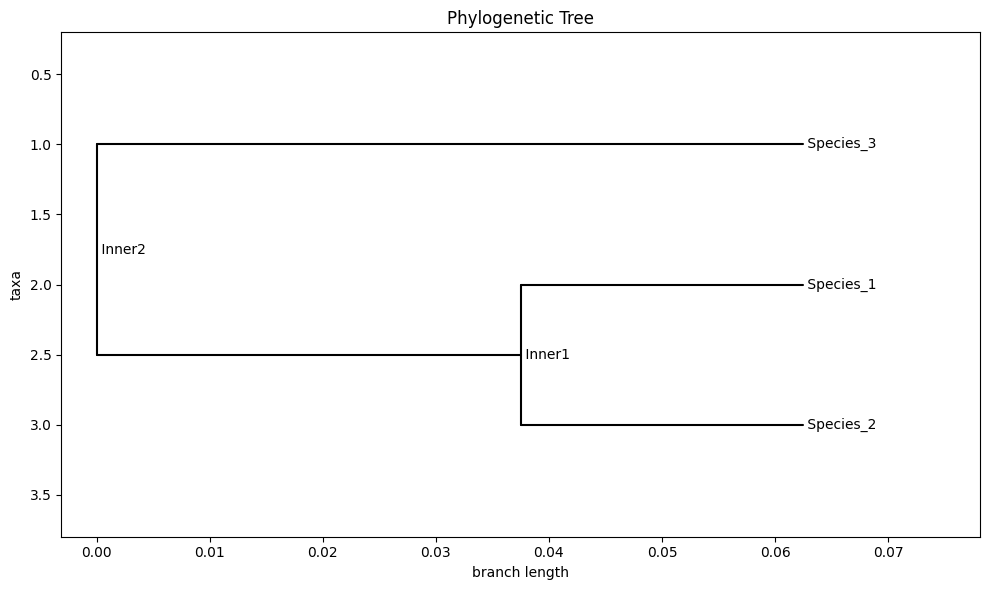

Tree image saved to: ../output/tree_images/parsimony_tree.png


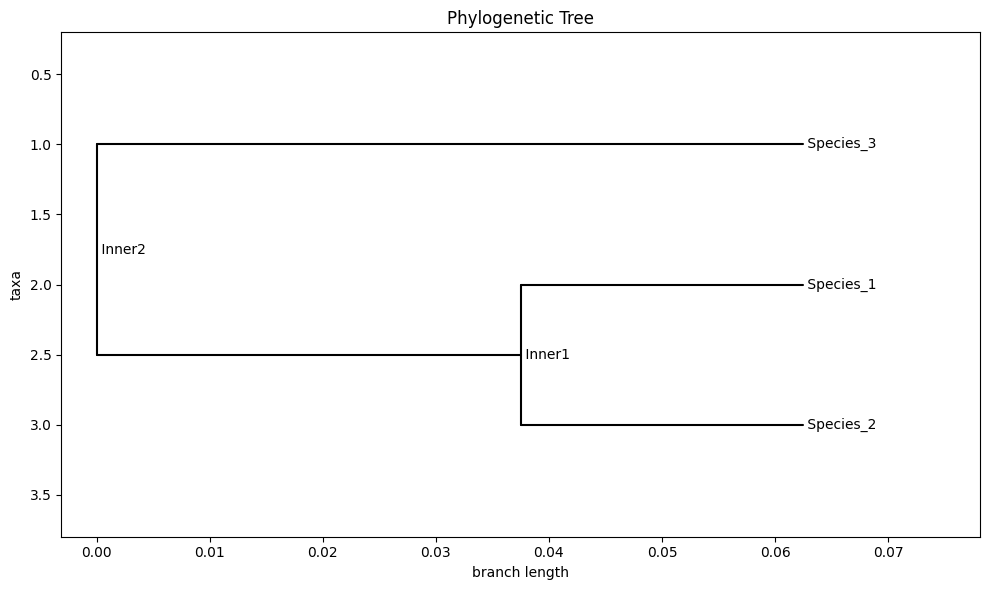

In [3]:
from visualize_tree import visualize_tree

tree_file = "../output/parsimony_tree.newick"

# Display in notebook
visualize_tree(tree_file)

# Save a PNG version for curriculum or class use
visualize_tree(tree_file, save_path="../output/tree_images/parsimony_tree.png")


## ✅ Done!

- The tree was built and displayed successfully.
- A copy was saved as `.png` in `output/tree_images/` for use in handouts, slides, or interactive activities.

🌻 Created with the **Pipeline Bio** toolkit.

## 🔁 Full Pipeline (Optional Script Version)


In [4]:
# Evolutionary Tree Analyzer Pipeline 

# Imports
from src.fasta_parser import parse_fasta
from src.align_sequences import align_sequences
from src.build_tree import build_parsimony_tree, build_likelihood_tree
from src.visualize_tree import visualize_tree

# Paths
input_fasta = "data/example_sequences.fasta"
aligned_fasta = "output/aligned_sequences.fasta"
parsimony_tree_output = "output/tree_images/parsimony_tree.png"
ml_tree_output = "output/tree_images/ml_tree.png"

# 1. Parse input FASTA
records = parse_fasta(input_fasta)
print(f"Parsed {len(records)} sequences.")

# 2. Align sequences
align_sequences(input_fasta, aligned_fasta)
print("Alignment complete.")

# 3. Build phylogenetic trees
build_parsimony_tree(aligned_fasta)
build_likelihood_tree(aligned_fasta)
print("Tree construction complete.")

# 4. Visualize trees
visualize_tree("output/parsimony_tree.newick")  
visualize_tree("output/ml_tree.newick")


ModuleNotFoundError: No module named 'src'